In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
mov = pd.read_csv("movies.csv")
mov

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [49]:
rat = pd.read_csv("ratings.csv")
rat

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [50]:
df = pd.merge(mov, rat)
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [51]:
print(pd.isna(df).sum())

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64


In [52]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings["num of ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

In [53]:
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

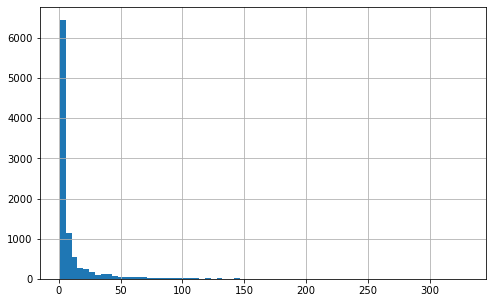

In [54]:
plt.figure(figsize=(8,5))
ratings["num of ratings"].hist(bins=70)

<AxesSubplot:>

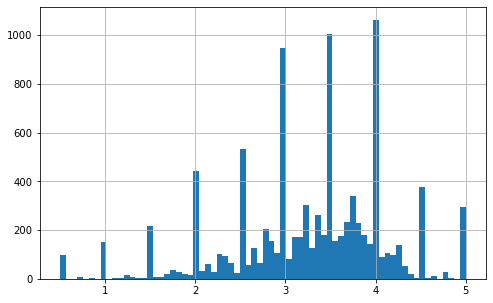

In [55]:
plt.figure(figsize=(8,5))
ratings["rating"].hist(bins=70)

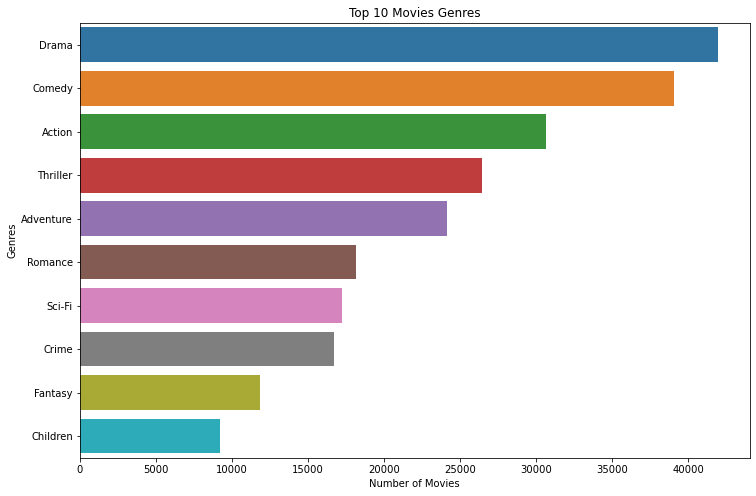

In [56]:
catcounts = df['genres'].str.split('|').explode().value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=catcounts.values[:10], y=catcounts.index[:10])
plt.title('Top 10 Movies Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

In [57]:
moviematrix = df.pivot_table(index="userId", columns="title", values="rating")
moviematrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [72]:
def recommend_movies(movie_name):
    if movie_name not in moviematrix:
        return f"Movie '{movie_name}' not found in the dataset, please enter another movie name."

    #user ratings for the given movie
    user_ratings = moviematrix[movie_name]

    #the correlation with other movies
    similarmovie = moviematrix.corrwith(user_ratings)

    #dataframe for the correlation results
    corrmovie = pd.DataFrame(similarmovie, columns=["Correlation"])
    corrmovie.dropna(inplace=True)
    corrmovie = corrmovie.join(ratings["num of ratings"])

    #the top 10 similar movies with more than 100 ratings
    recommendations = corrmovie[corrmovie["num of ratings"] > 100].sort_values("Correlation", ascending=False).head(10)
    return recommendations

In [73]:
movie_name = input("Enter a movie name: ")

Enter a movie name: Pulp Fiction (1994)


In [74]:
recommendations = recommend_movies(movie_name)
print(recommendations)

                                                    Correlation  \
title                                                             
Pulp Fiction (1994)                                    1.000000   
Fight Club (1999)                                      0.543465   
Kill Bill: Vol. 1 (2003)                               0.504147   
Trainspotting (1996)                                   0.437714   
Kill Bill: Vol. 2 (2004)                               0.421685   
Usual Suspects, The (1995)                             0.411700   
Amelie (Fabuleux destin d'Amélie Poulain, Le) (...     0.402193   
Eternal Sunshine of the Spotless Mind (2004)           0.401534   
Reservoir Dogs (1992)                                  0.394687   
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)              0.391141   

                                                    num of ratings  
title                                                               
Pulp Fiction (1994)                                      